In [1]:
from convpers import CPT
from convpers import Vectorize
from convpers import Testing
from convpers import Filters
from convpers import Data

%load_ext autoreload
%autoreload 2

In [2]:
%%capture
#Load data
X,y = Data.KS_dataset(1,[1,1.25,1.5,1.75,2])

Text(0.5, 0.98, 'Kuramoto Sivanshinsky Examples')

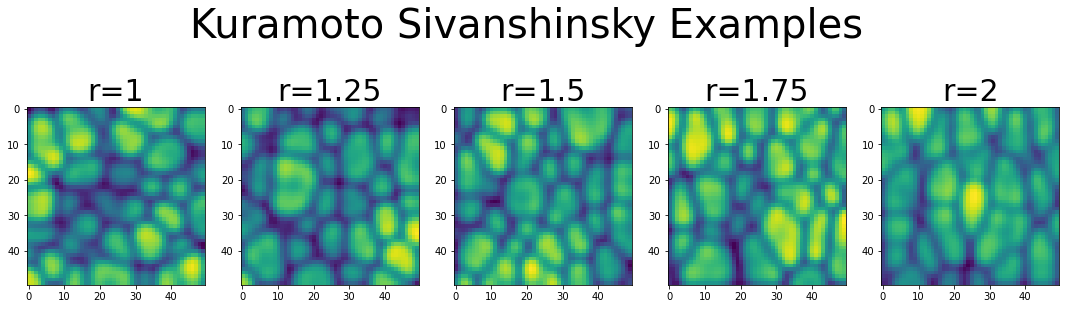

In [21]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,5)
fig.set_size_inches(18.5, 5.5)
axs[0].imshow(X[0])
axs[0].set_title("r=1",fontsize=30)
axs[1].imshow(X[1])
axs[1].set_title("r=1.25",fontsize=30)
axs[2].imshow(X[2])
axs[2].set_title("r=1.5",fontsize=30)
axs[3].imshow(X[3])
axs[3].set_title("r=1.75",fontsize=30)
axs[4].imshow(X[4])
axs[4].set_title("r=2",fontsize=30)
fig.suptitle("Kuramoto Sivanshinsky Examples",fontsize=40)


In [103]:
%%capture
#Load data
X,y = Data.KS_dataset(500,[1,1.25,1.5,1.75,2])

In [104]:
import numpy as np
y = np.asarray([str(i) for i in y])

kNN Results:  [0.5383693  0.54501801 0.54021609]
Gradient Boosting Results:  [0.55395683 0.54621849 0.56542617]


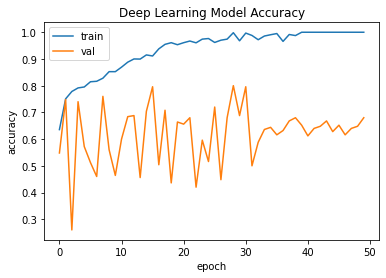

In [105]:
#Experiment 1A: No Convolutions, Persistence Images Concatenated
filter = Filters.blur_kernel(1)
diagrams = CPT.CPT(X,[filter])
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.5383693  0.54501801 0.54021609]
Gradient Boosting Results:  [0.55395683 0.54621849 0.56542617]


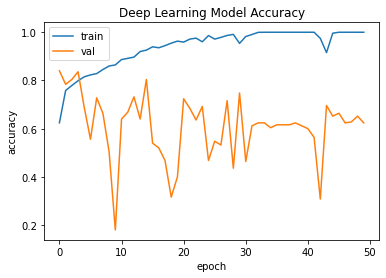

In [106]:
#Experiment 1B: No Convolutions, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.5059952  0.48619448 0.5030012 ]
Gradient Boosting Results:  [0.5971223  0.57743097 0.6002401 ]


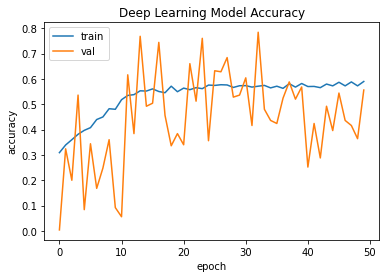

In [107]:
#Experiment 1C: No Convolutions, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.5059952  0.48619448 0.5030012 ]
Gradient Boosting Results:  [0.5971223  0.57743097 0.6002401 ]


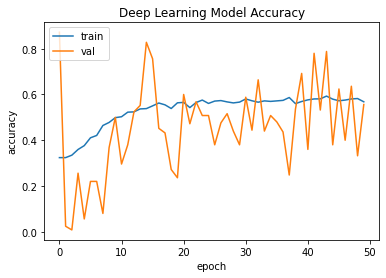

In [108]:
#Experiment 1D: No Convolutions, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.57793765 0.59663866 0.59183673]
Gradient Boosting Results:  [0.67865707 0.65906363 0.67827131]


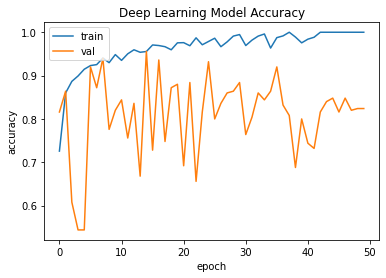

In [109]:
#Experiment 2A: Adding Convolutions with Standard Filters, Persistence Images Concatenated
filter1 = Filters.blur_kernel(1)
filter2 = Filters.blur_kernel(3)
filter3 = Filters.gaussian_kernel(3)
filter4 = Filters.sharpening_kernel(3)
diagrams = CPT.CPT(X,[filter1,filter2,filter3,filter4])
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.51798561 0.51260504 0.54621849]
Gradient Boosting Results:  [0.66546763 0.63145258 0.64585834]


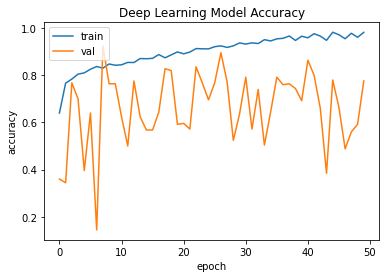

In [110]:
#Experiment 2B: Adding Convolutions with Standard Filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.558753   0.56782713 0.57503001]
Gradient Boosting Results:  [0.6618705  0.62545018 0.63985594]


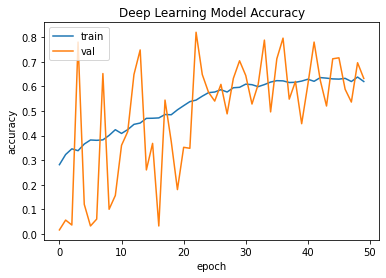

In [111]:
#Experiment 2C: Adding Convolutions with Standard Filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.50239808 0.51380552 0.49579832]
Gradient Boosting Results:  [0.60551559 0.58703481 0.61104442]


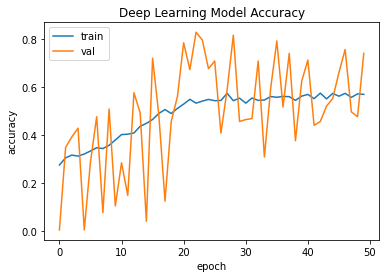

In [112]:
#Experiment 2D: Adding Convolutions with Standard Filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.46402878 0.46938776 0.44417767]
Gradient Boosting Results:  [0.54556355 0.54861945 0.54981993]


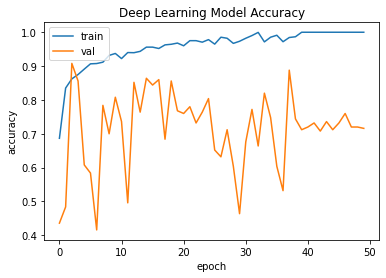

In [113]:
#Experiment 3A: Adding Convolutions with EigenFilters, Persistence Images Concatenated
eigen_filters = Filters.PCA_eigenfilters(X,l=3,n=3)
filters = Filters.random_linear_comb(eigen_filters,5)
diagrams = CPT.CPT(X,filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.44724221 0.44057623 0.45858343]
Gradient Boosting Results:  [0.54676259 0.53421369 0.50540216]


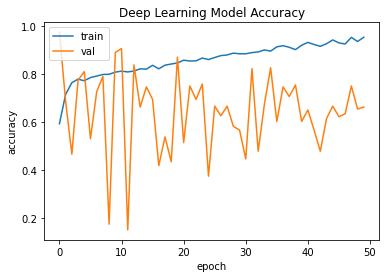

In [114]:
#Experiment 3B: Adding Convolutions with EigenFilters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.62589928 0.6122449  0.6122449 ]
Gradient Boosting Results:  [0.67505995 0.68067227 0.69147659]


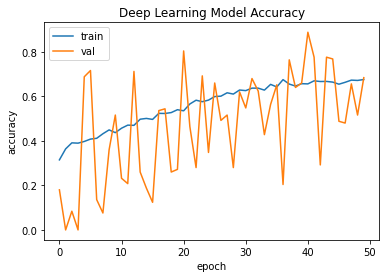

In [115]:
#Experiment 3C: Adding Convolutions with EigenFilters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.60191847 0.6002401  0.58703481]
Gradient Boosting Results:  [0.6498801  0.65186074 0.67947179]


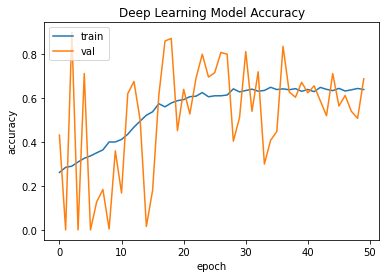

In [116]:
#Experiment 3D: Adding Convolutions with EigenFilters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.49040767 0.50060024 0.54621849]
Gradient Boosting Results:  [0.57793765 0.58943577 0.59063625]


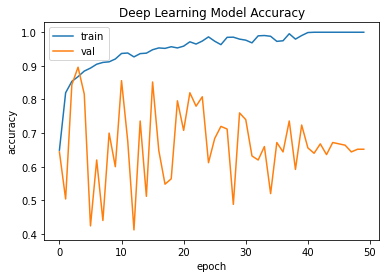

In [117]:
#Experiment 4A: Random Filters, Persistence Images Concatenated
random_filters = Filters.random_filters(l=3,n=5)
diagrams = CPT.CPT(X,random_filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.49640288 0.484994   0.4969988 ]
Gradient Boosting Results:  [0.58752998 0.58343337 0.54381753]


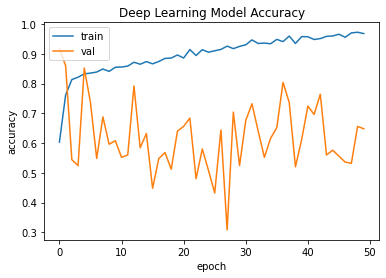

In [118]:
#Experiment 4B: Random Filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.60191847 0.6182473  0.58823529]
Gradient Boosting Results:  [0.68105516 0.67707083 0.69027611]


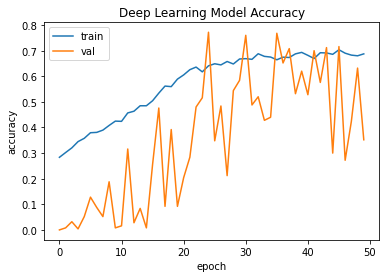

In [119]:
#Experiment 4C: Random Filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.56594724 0.58343337 0.57262905]
Gradient Boosting Results:  [0.65467626 0.64345738 0.67346939]


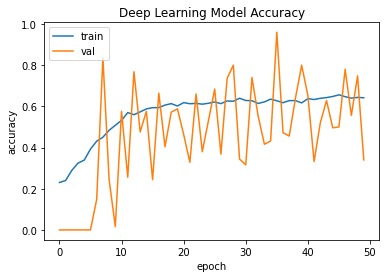

In [120]:
#Experiment 4D: Random Filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.68705036 0.70708283 0.71188475]
Gradient Boosting Results:  [0.73261391 0.74669868 0.74309724]


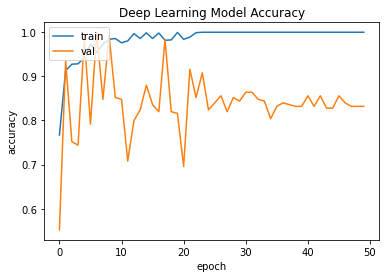

In [121]:
#Experiment 5A: Lots of random filters, Persistence Images Concatenated
random_filters = Filters.random_filters(l=3,n=25)
diagrams = CPT.CPT(X,random_filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.68465228 0.63985594 0.68067227]
Gradient Boosting Results:  [0.69784173 0.69027611 0.69267707]


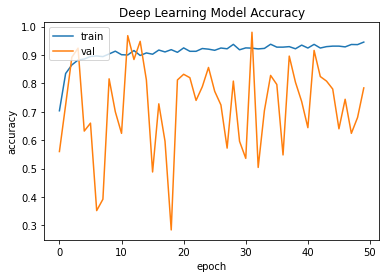

In [122]:
#Experiment 5B: Lots of random filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.68585132 0.68187275 0.66866747]
Gradient Boosting Results:  [0.75899281 0.72268908 0.72629052]


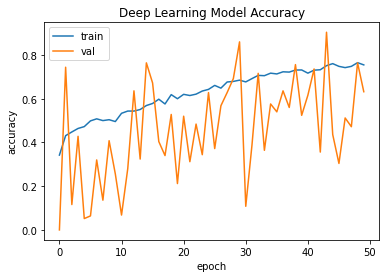

In [123]:
#Experiment 5C: Lots of random filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.58273381 0.58703481 0.60144058]
Gradient Boosting Results:  [0.67985612 0.65906363 0.69507803]


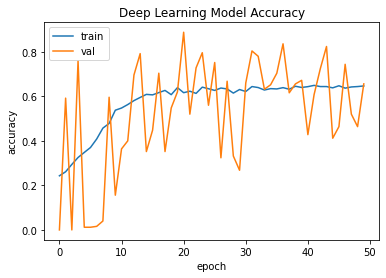

In [124]:
#Experiment 5D: Lots of random filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)